In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scp
import scipy.stats as stats
import numpy as np

In [4]:
hpca = pd.read_csv('../summary_data/CombinedHPCA.tsv',sep='\t')
hpca.head()

,accession,geo,type,Survivor,age,sex,score_type,severity_score,MSC,Fibroblasts,...,Monocytes_CD16.CD14.,Macrophage,M1.IFNg.,M2.IL.4.,M.IFNa.,T_cells_.CD4..,T_cells_.CD8..,T_cells_.gamma.delta.,NK_cells,Neutrophils
0,E-MEXP-3567,X104,training,YES,0.5,M,NaN,NaN,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.00143,0.20308,0.0,0.00000,0.34536
1,E-MEXP-3567,X105,training,YES,0.5,M,NaN,NaN,0.0,0.0,...,0.0,0.02971,0.0,0.0,0.0,0.08045,0.18755,0.0,0.00000,0.35102
2,E-MEXP-3567,X109,training,YES,0.5,F,NaN,NaN,0.0,0.0,...,0.0,0.03530,0.0,0.0,0.0,0.11913,0.20330,0.0,0.00000,0.32004
3,E-MEXP-3567,X115,training,NO,0.5,M,NaN,NaN,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.07870,0.19933,0.0,0.00000,0.38310
4,E-MEXP-3567,X121,training,NO,0.5,F,NaN,NaN,0.0,0.0,...,0.0,0.04548,0.0,0.0,0.0,0.01437,0.17675,0.0,0.00284,0.42273


In [54]:
lm22 = pd.read_csv('../summary_data/CombinedLM22.tsv',sep='\t')
lm22.head()

,accession,geo,type,Survivor,age,sex,score_type,severity_score,B_cells_naive,B_cells_memory,...,Macrophages,Macrophages_M0,Macrophages_M1,Macrophages_M2,Dendritic_cells_resting,Dendritic_cells_activated,Mast_cells_resting,Mast_cells_activated,Eosinophils,Neutrophils
0,E-MEXP-3567,X104,training,YES,0.5,M,NaN,NaN,0.06322,0.06782,...,0.10335,0.09282,0.0,0.01053,0.0,0.0,0.0,0.0,0.0,0.31637
1,E-MEXP-3567,X105,training,YES,0.5,M,NaN,NaN,0.08319,0.07091,...,0.25630,0.25630,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.24822
2,E-MEXP-3567,X109,training,YES,0.5,F,NaN,NaN,0.08426,0.04698,...,0.21885,0.21885,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.24536
3,E-MEXP-3567,X115,training,NO,0.5,M,NaN,NaN,0.06117,0.09404,...,0.11886,0.11886,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.32486
4,E-MEXP-3567,X121,training,NO,0.5,F,NaN,NaN,0.05966,0.01237,...,0.27913,0.27913,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.31262


In [40]:
def my_star(p_value):
    if p_value <= 0.001:
        return '***'
    elif p_value <= 0.01:
        return '**'
    elif p_value <= 0.05:
        return '*'
    else:
        return "None"

Text(0, 0.5, 'Age')

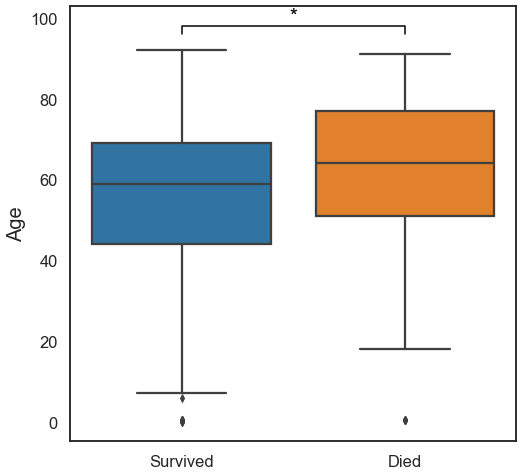

In [42]:
plt.figure(figsize=(8,8))
sns.set_style('white')
sns.set_context('talk')
age = sns.boxplot(x="Survivor", y="age", data=lm22,
           order=["YES", "NO"])
x1, x2 = 0, 1
y, h, col = lm22['age'].max() + 4, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
p_value = stats.mannwhitneyu(lm22[(lm22.Survivor=='YES')].age.tolist(),
                         lm22[(lm22.Survivor=='NO')].age.tolist())
plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=20)
#plt.yscale('log')
age.set_xticklabels(['Survived','Died'])
plt.xlabel("")
plt.ylabel("Age", fontsize=20)
#plt.savefig('../figures/age.png', bbox_inches='tight', pad_inches=.5)

2.0153724447127467e-06


Text(0, 0.5, 'Severity score')

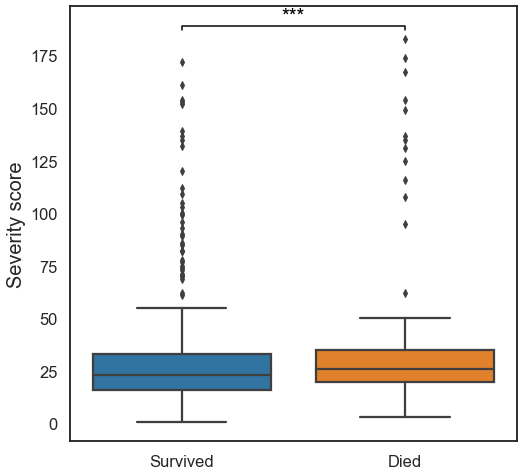

In [86]:
plt.figure(figsize=(8,8))
sns.set_style('white')
sns.set_context('talk')
age = sns.boxplot(x="Survivor", y="severity_score", data=lm22,
           order=["YES", "NO"])
x1, x2 = 0, 1
y, h, col = lm22['severity_score'].max() + 4, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
p_value = stats.mannwhitneyu(lm22[(lm22.Survivor=='YES')].severity_score.tolist(),
                         lm22[(lm22.Survivor=='NO')].severity_score.tolist())
print(p_value[1])
plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=20)
#plt.yscale('log')
age.set_xticklabels(['Survived','Died'])
plt.xlabel("")
plt.ylabel("Severity score", fontsize=20)

0.013561767364305564


Text(0, 0.5, 'T cells')

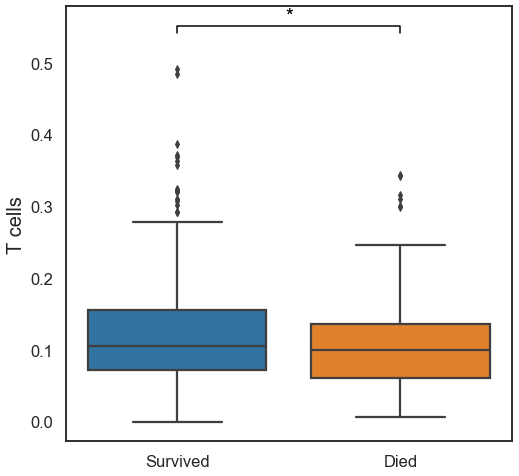

In [84]:
plt.figure(figsize=(8,8))
sns.set_style('white')
sns.set_context('talk')
age = sns.boxplot(x="Survivor", y="T_cells", data=lm22,
           order=["YES", "NO"])

p_value = stats.mannwhitneyu(lm22[(lm22.Survivor=='YES')].T_cells.tolist(),
                         lm22[(lm22.Survivor=='NO')].T_cells.tolist())
x1, x2 = 0, 1
y, h, col = lm22['T_cells'].max() + .05, .01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
print(p_value[1])
plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=20)
#plt.yscale('log')
age.set_xticklabels(['Survived','Died'])
plt.xlabel("")
plt.ylabel("T cells", fontsize=20)

0.0014016148190940181


Text(0, 0.5, 'T cells (CD4+)')

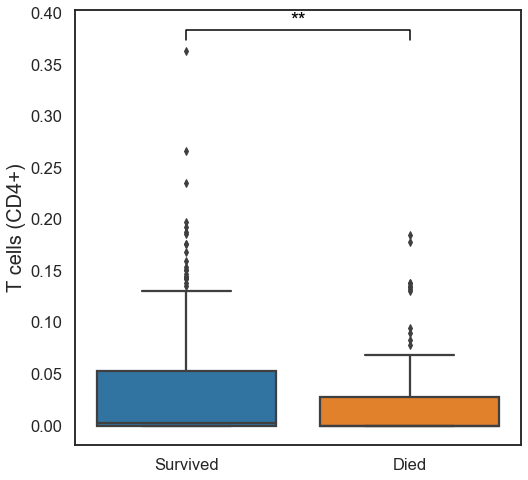

In [90]:
plt.figure(figsize=(8,8))
sns.set_style('white')
sns.set_context('talk')
age = sns.boxplot(x="Survivor", y="T_cells_CD4", data=lm22,
           order=["YES", "NO"])
x1, x2 = 0, 1
y, h, col = lm22['T_cells_CD4'].max() + .01, .01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
p_value = stats.mannwhitneyu(lm22[(lm22.Survivor=='YES')].T_cells_CD4.tolist(),
                         lm22[(lm22.Survivor=='NO')].T_cells_CD4.tolist())
print(p_value[1])
plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=20)
#plt.yscale('log')
age.set_xticklabels(['Survived','Died'])
plt.xlabel("")
plt.ylabel("T cells (CD4+)", fontsize=20)

0.00030685989213471564


Text(0, 0.5, 'Macrophages')

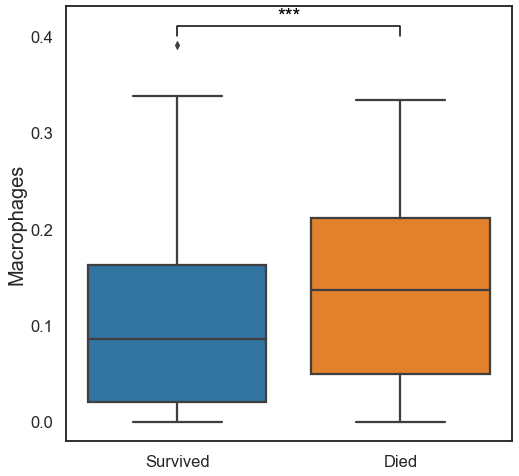

In [92]:
plt.figure(figsize=(8,8))
sns.set_style('white')
sns.set_context('talk')
age = sns.boxplot(x="Survivor", y="Macrophages", data=lm22,
           order=["YES", "NO"])
x1, x2 = 0, 1
y, h, col = lm22['Macrophages'].max() + .01, .01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
p_value = stats.mannwhitneyu(lm22[(lm22.Survivor=='YES')].Macrophages.tolist(),
                         lm22[(lm22.Survivor=='NO')].Macrophages.tolist())
print(p_value[1])
plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=20)
#plt.yscale('log')
age.set_xticklabels(['Survived','Died'])
plt.xlabel("")
plt.ylabel("Macrophages", fontsize=20)